<a href="https://colab.research.google.com/github/Jorgiane/Jorgiane/blob/main/Coleta%20e%20Armazenamento%20de%20Dados%20-%20Trilha%202%3A%20Tarefa%20(Peso%203).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [93]:
import pandas as pd
import requests
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import seaborn as sn

In [94]:
def scrape_stats(base_url, year_start, year_end):
    years = range(year_start,year_end+1,1)

    final_df = pd.DataFrame()

    for year in years:
        print('Extraindo ano {}'.format(year))
        req_url = base_url.format(year)
        req = requests.get(req_url)
        soup = BeautifulSoup(req.content, 'html.parser')
        table = soup.find('table', {'id':'totals_stats'})
        df = pd.read_html(str(table))[0]
        df['Year'] = year
        final_df = final_df.append(df)
    return final_df
url = 'https://www.basketball-reference.com/leagues/NBA_{}_totals.html'
df = scrape_stats(url, 2013, 2021)

Extraindo ano 2013
Extraindo ano 2014
Extraindo ano 2015
Extraindo ano 2016
Extraindo ano 2017
Extraindo ano 2018
Extraindo ano 2019
Extraindo ano 2020
Extraindo ano 2021


In [95]:
drop_indexes = df[df['Rk'] == 'Rk'].index # Pega indexes onde a coluna 'Rk' possui valor 'Rk'
df.drop(drop_indexes, inplace=True) # elimina os valores dos index passados da tabela

In [96]:
numeric_cols = df.columns.drop(['Player','Pos','Tm'])
df[numeric_cols] = df[numeric_cols].apply(pd.to_numeric)

In [97]:
import matplotlib.pyplot as plt
import seaborn as sns

In [98]:
df[df.index.duplicated()]

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Year
0,1,Quincy Acy,SF,23,TOT,63,0,847,66,141,0.468,4,15,0.267,62,126,0.492,0.482,35,53,0.660,72,144,216,28,23,26,30,122,171,2014
1,1,Quincy Acy,SF,23,TOR,7,0,61,6,14,0.429,2,5,0.400,4,9,0.444,0.500,5,8,0.625,5,10,15,4,4,3,2,8,19,2014
2,1,Quincy Acy,SF,23,SAC,56,0,786,60,127,0.472,2,10,0.200,58,117,0.496,0.480,30,45,0.667,67,134,201,24,19,23,28,114,152,2014
3,2,Steven Adams,C,20,OKC,81,20,1197,93,185,0.503,0,0,NaN,93,185,0.503,0.503,79,136,0.581,142,190,332,43,40,57,71,203,265,2014
4,3,Jeff Adrien,PF,27,TOT,53,12,961,143,275,0.520,0,0,NaN,143,275,0.520,0.520,76,119,0.639,102,204,306,38,24,36,39,108,362,2014
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,536,Delon Wright,PG,28,SAC,27,8,696,104,225,0.462,33,83,0.398,71,142,0.500,0.536,30,36,0.833,28,77,105,97,43,11,35,30,271,2021
727,537,Thaddeus Young,PF,32,CHI,68,23,1652,370,662,0.559,12,45,0.267,358,617,0.580,0.568,71,113,0.628,168,255,423,291,74,40,137,152,823,2021
728,538,Trae Young,PG,22,ATL,63,63,2125,487,1112,0.438,136,397,0.343,351,715,0.491,0.499,484,546,0.886,38,207,245,594,53,12,261,111,1594,2021
729,539,Cody Zeller,C,28,CHO,48,21,1005,181,324,0.559,4,28,0.143,177,296,0.598,0.565,85,119,0.714,119,209,328,86,27,17,51,121,451,2021


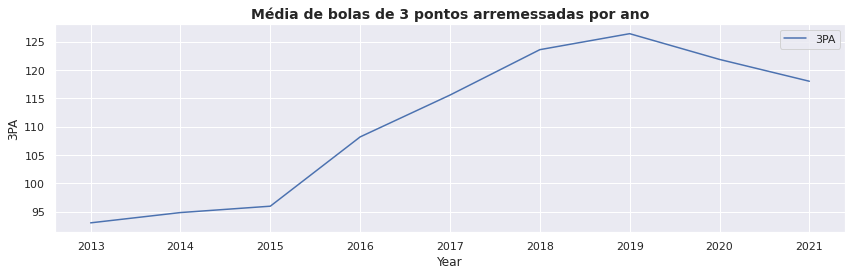


DF ordenado por bola de 3 pontos em ordem decrescente por ano
            Player   3P  Year
121  Stephen Curry  402  2016
165  Stephen Curry  354  2019
124  Stephen Curry  324  2017
140  Stephen Curry  286  2015
304    Buddy Hield  278  2019

DF ordenado por bola de 3 pontos em ordem decrescente após agrupar por jogador


,Player,3P,3PA
121,Stephen Curry,402,886
165,Stephen Curry,354,810
124,Stephen Curry,324,789
140,Stephen Curry,286,646
304,Buddy Hield,278,651


In [99]:
# Agrupando os dados por ano e somando os valores
# https://www.delftstack.com/howto/python-pandas/how-to-get-average-of-a-column-of-a-pandas-dataframe/
grouped_df_lineplot = df.groupby('Year', as_index=False).mean()
#print(grouped_df_lineplot.describe())
# Gráfico em linha usando a média dos dados (IMPORTANTE: SE NÃO FIZER GROUP BY DOS DADOS RETORNA "ValueError: cannot reindex from a duplicate axis")
#https://stackabuse.com/seaborn-line-plot-tutorial-and-examples/
plt.figure(figsize=(12,4))
sns.set_theme(style="darkgrid")
sns.lineplot(x="Year", y="3PA", data=grouped_df_lineplot, label = '3PA')
plt.title('Média de bolas de 3 pontos arremessadas por ano', fontsize=14,weight='bold')
#plt.grid(bool,'both')
plt.legend()
plt.tight_layout()
plt.show()

#---------------------------------------------------------------------------------------------

# Ordena Data Frame por bola de 3 pontos convertidas em ordem decrescente
sorted_df = df.sort_values(by=['3P'], axis=0, ascending=False)

# Mostra 5 primeiras posições da tabela
print('\n\033[1mDF ordenado por bola de 3 pontos em ordem decrescente por ano\033[0m')
sorted_df[['Player','3P','Year']].head()
print(sorted_df[['Player','3P','Year']].head())

# Agrupando os dados por jogador e somando os valores
grouped_df = df.groupby('Player', as_index=False).sum()

# Ordena Data Frame por bolas de 3 pontos convertidas em ordem decrescente
sorted_df = df.sort_values(by=['3P'], axis=0, ascending=False)

# Mostra 5 primeiras posições da tabela
print('\n\033[1mDF ordenado por bola de 3 pontos em ordem decrescente após agrupar por jogador\033[0m')
sorted_df[['Player', '3P', '3PA']].head()